# 41. Getting Setup and What We Are Covering

In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predicitons and evaluating model",
    5: "saving and loading a model"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predicitons and evaluating model',
 5: 'saving and loading a model'}

In [2]:
import torch
from torch import nn ## nn contains all
import matplotlib.pyplot as plt

torch.__version__


'2.6.0+cu126'

# 42. Creating a Simple Dataset Using the Linear Regression Formula

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

X[:10], y[:10], len(X)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

# 43. Splitting Our Data Into Training and Test Sets

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# 44. Building a function to Visualize Our Data

In [5]:
def plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_labels=y_test,
        predictions=None,
):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data, train_labels, c='blue', s=4, label='Training data')
    plt.scatter(X_test, test_labels, c='red', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(X_test, predictions, c='green', s=4, label='Predictions')
    plt.legend(prop={'size': 14})

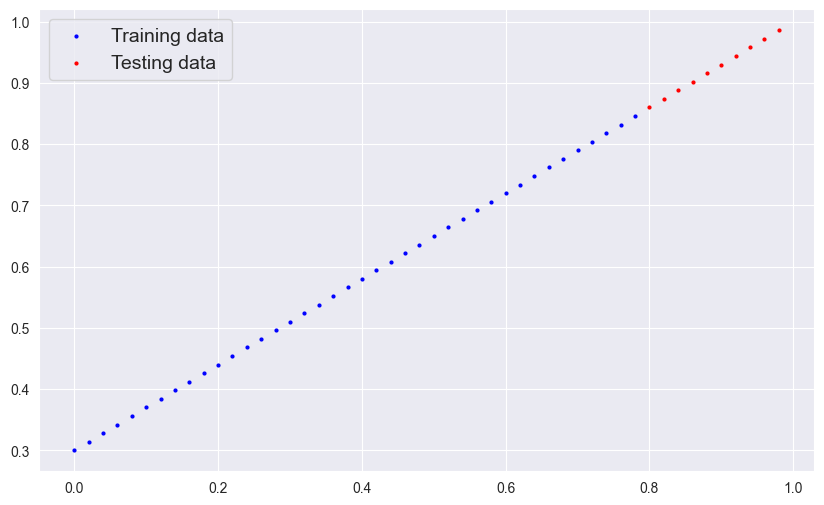

In [6]:
plot_predictions()

# 45. Creating Our First PyTorch Model for Linear Regression

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# 46. Breaking Down What's Happening in Our PyTorch Linear regression Model

# 47. Discussing Some of the Most Important PyTorch Model Building Classes

# 48. Checking Out the Internals of Our PyTorch Model

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

# 49. Making Predictions With Our Random Model Using Inference Mode

In [12]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

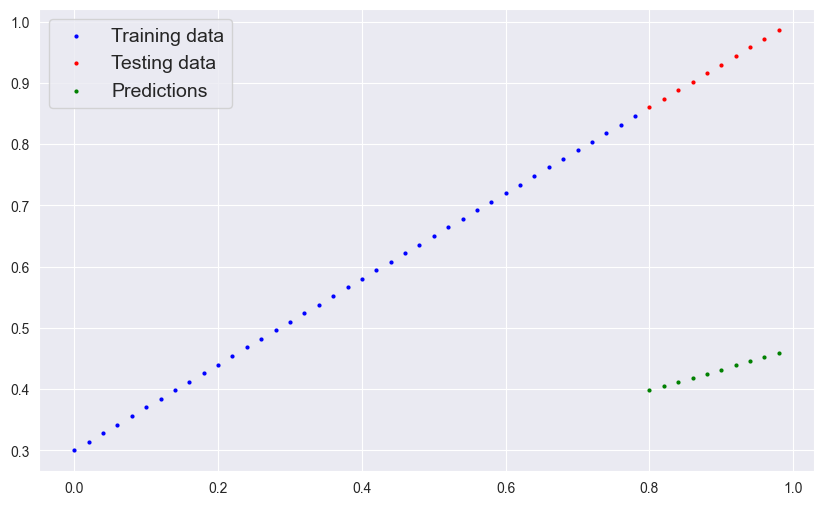

In [13]:
plot_predictions(predictions=y_preds)

# 50. Training a Model Intuition (The Things We Need)

In [14]:
# loss function - the function we use to measure how far off our predictions are from the actual data
# loss function might be called cost function or criterion function.
# loss function - measures how far off our predictions are from the actual data
# optimizer - the algorithm we use to adjust the parameters of our model so they best fit the training data

# And especially for PyTorch, we need:
# A training loop
# A testing loop

loss_fn = nn.MSELoss()

In [15]:
model_0.parameters()

<generator object Module.parameters at 0x000001CA8E6F8D60>

# 51. Setting Up an Optimizer and a Loss Function

In [16]:
# set up the lost function
loss_fn = nn.MSELoss() # how wrong is our model?

In [18]:
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.001
) # how do we adjust the parameters?

# 52. PyTorch Training Loop Steps and Intuition